<a href="https://colab.research.google.com/github/bvsaik/ML_Projects/blob/main/AIT664Q4_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and prepare data
df = pd.read_csv("C:/Users/vbopp/Downloads/modified_data.csv",encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           178396 non-null  object 
 1   Days_for_shipping_(real)       178396 non-null  int64  
 2   Days_for_shipment_(scheduled)  178396 non-null  int64  
 3   Benefit_per_order              178396 non-null  float64
 4   Delivery_Status                178396 non-null  object 
 5   Late_delivery_risk             178396 non-null  int64  
 6   Category_Id                    178396 non-null  int64  
 7   Category_Name                  178396 non-null  object 
 8   Customer_City                  178396 non-null  object 
 9   Customer_Country               178396 non-null  object 
 10  Customer_Id                    178396 non-null  int64  
 11  Customer_Segment               178396 non-null  object 
 12  Customer_State                

In [ ]:
data=df

columns_to_drop = [
    'Customer_City',
    'Customer_Id',
    'Customer_State',
    'Customer_Street',
    'Customer_Zipcode',
    'Department_Id',
    'Order_City',
    'Category_Id',
    'Latitude',
    'Longitude',
    'Order_Id',
    'Order_Item_Id',
    'Order_State',
    'Product_Card_Id',
    'order_time',
    'shipping_time']

# Exclude the target and columns to drop
data.drop(columns=columns_to_drop, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           178396 non-null  object 
 1   Days_for_shipping_(real)       178396 non-null  int64  
 2   Days_for_shipment_(scheduled)  178396 non-null  int64  
 3   Benefit_per_order              178396 non-null  float64
 4   Delivery_Status                178396 non-null  object 
 5   Late_delivery_risk             178396 non-null  int64  
 6   Category_Name                  178396 non-null  object 
 7   Customer_Country               178396 non-null  object 
 8   Customer_Segment               178396 non-null  object 
 9   Market                         178396 non-null  object 
 10  Order_Country                  178396 non-null  object 
 11  Order_Item_Discount            178396 non-null  float64
 12  Order_Item_Discount_Rate      

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Delivery_Status                  0
Late_delivery_risk               0
Category_Name                    0
Customer_Country                 0
Customer_Segment                 0
Market                           0
Order_Country                    0
Order_Item_Discount              0
Order_Item_Discount_Rate         0
Order_Item_Profit_Ratio          0
Order_Item_Quantity              0
Sales                            0
Order_Item_Total                 0
Order_Region                     0
Order_Status                     0
Product_Name                     0
Product_Price                    0
Shipping_Mode                    0
order_date                       0
shipping_date_only               0
dtype: int64

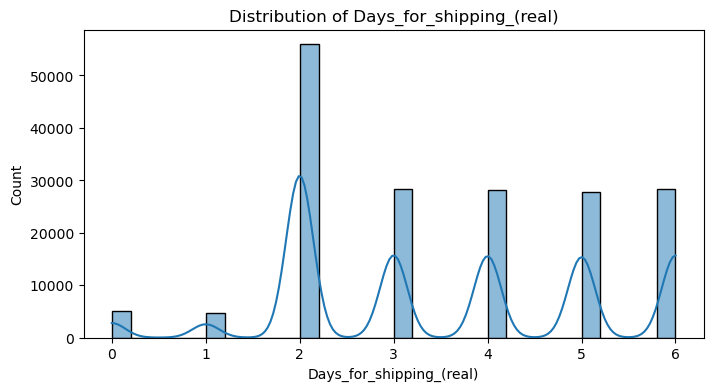

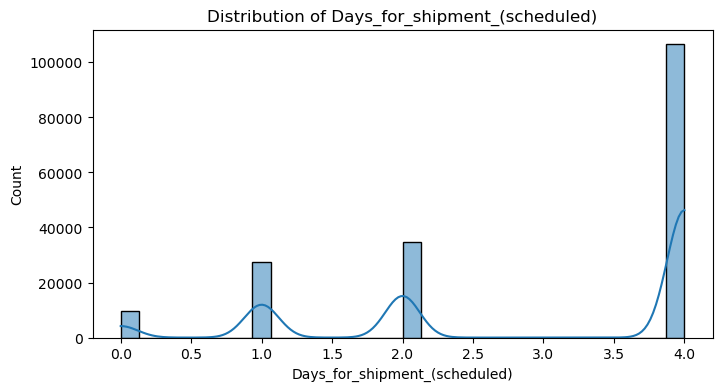

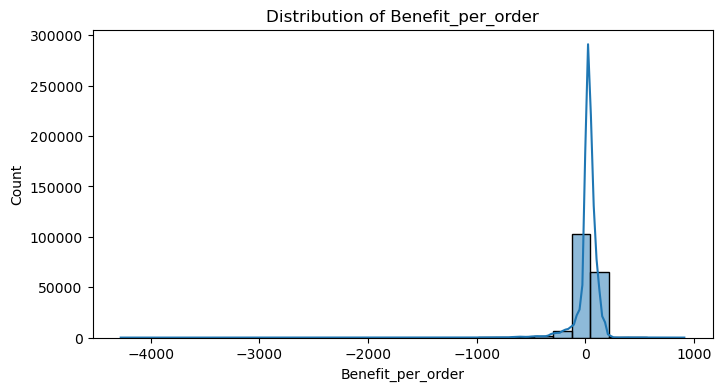

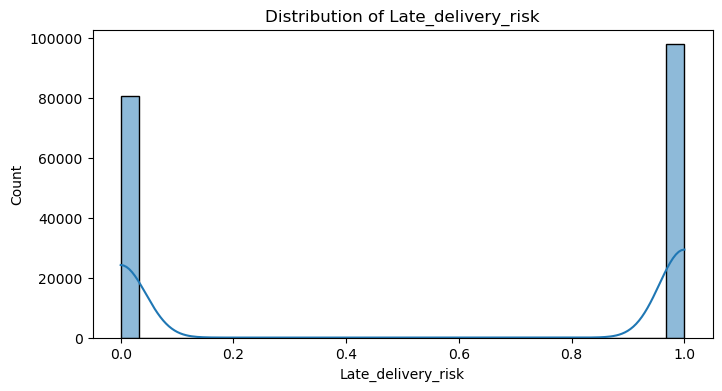

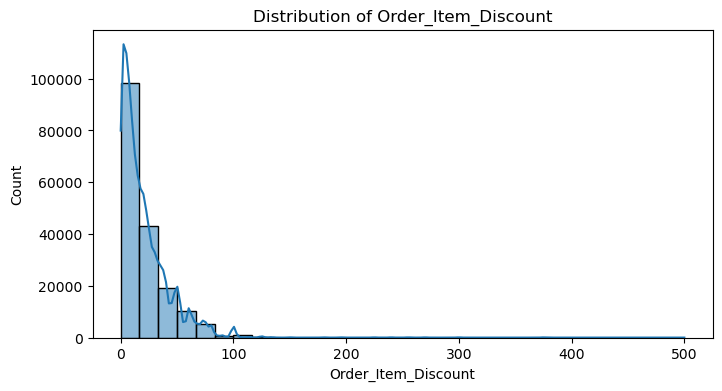

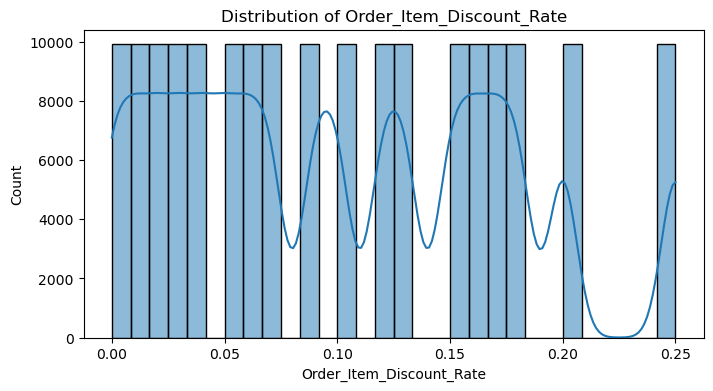

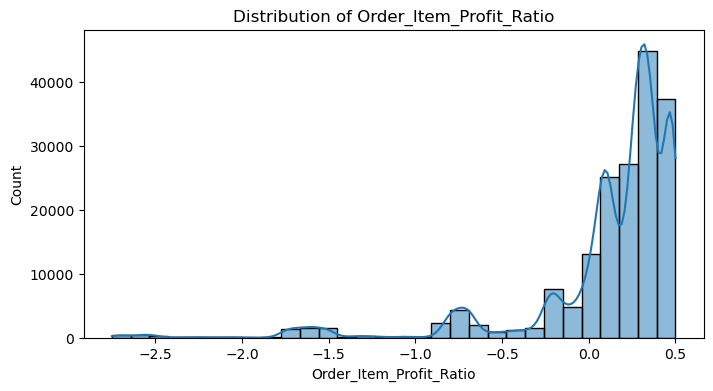

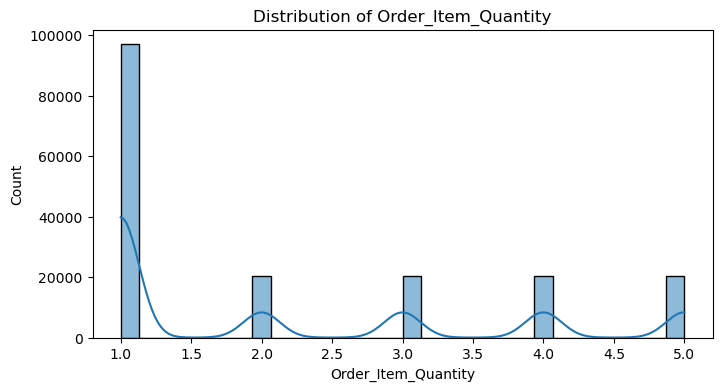

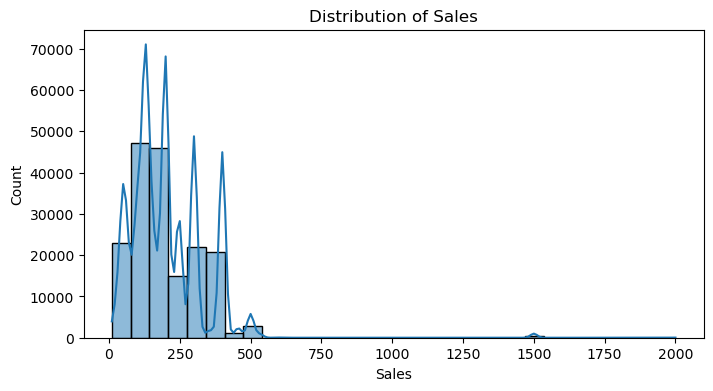

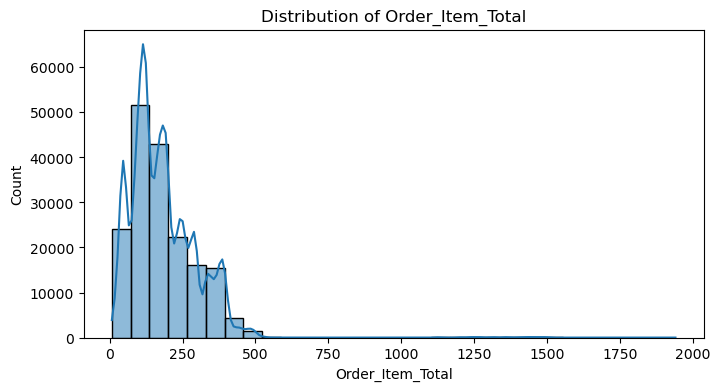

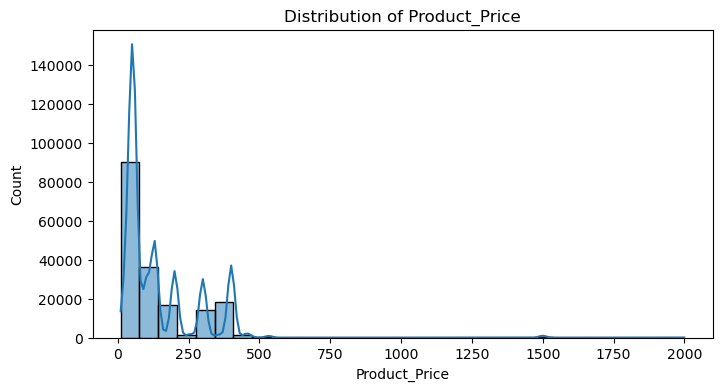

In [ ]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Histogram and KDE plots
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


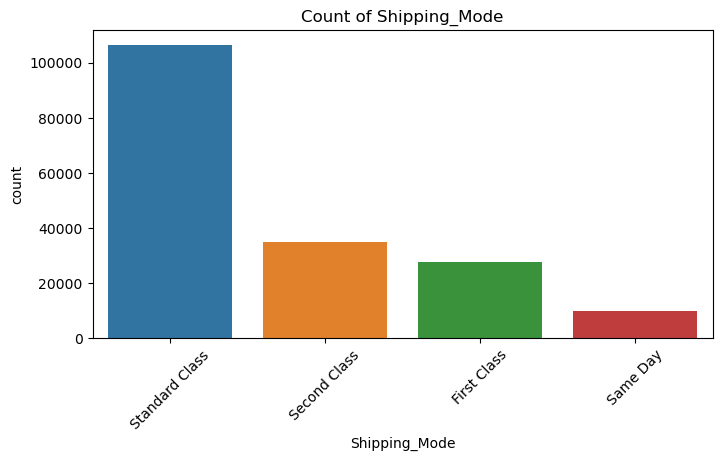

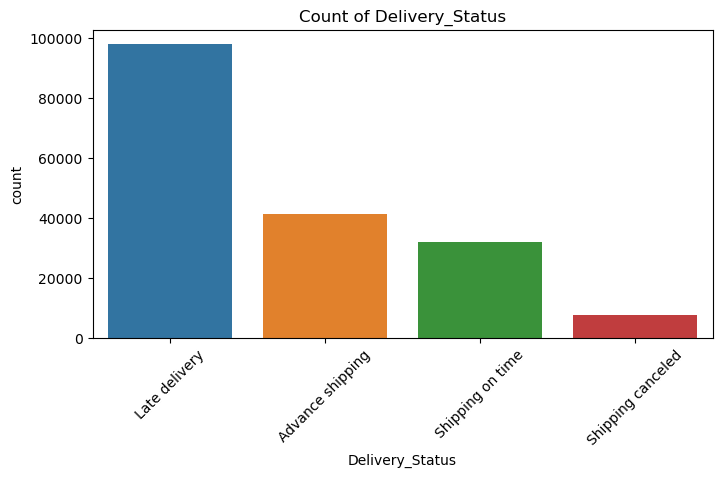

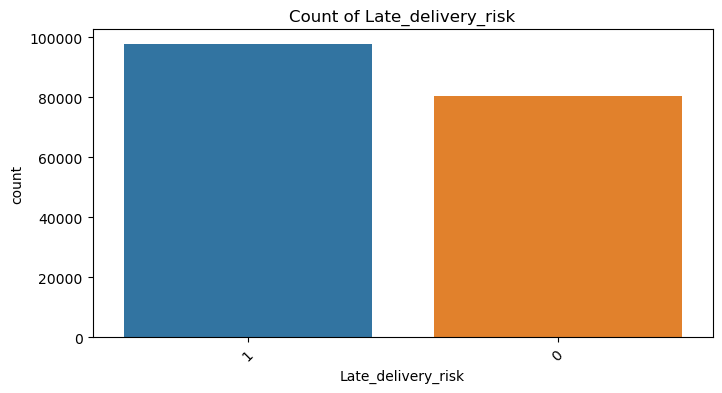

In [ ]:
categorical_features = ['Shipping_Mode', 'Delivery_Status', 'Late_delivery_risk']

# Count plots
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\vbopp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


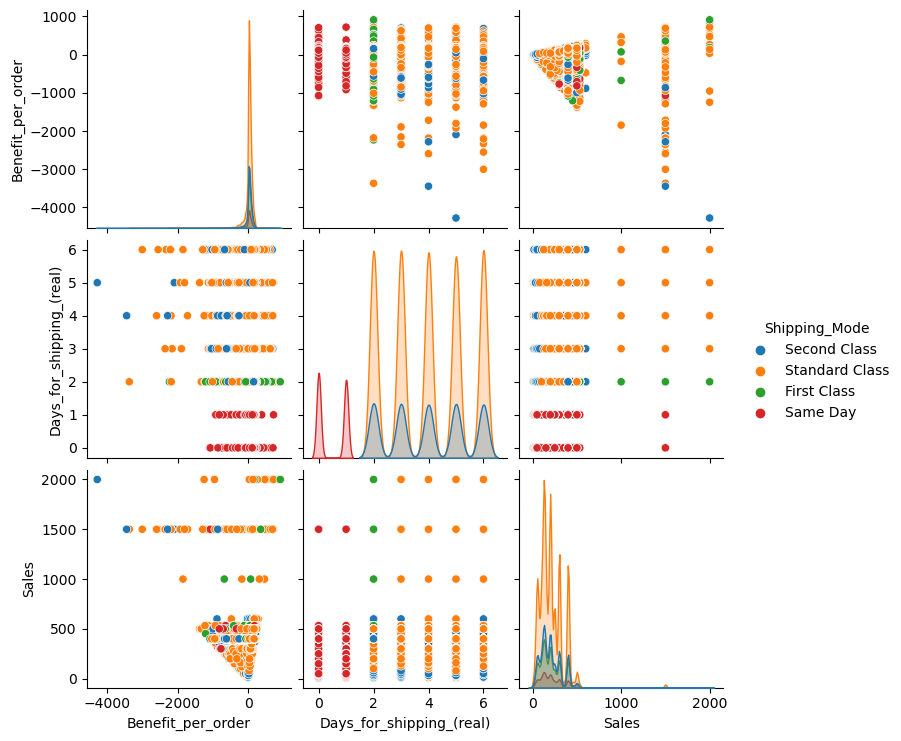

In [ ]:
sns.pairplot(df, vars=['Benefit_per_order', 'Days_for_shipping_(real)', 'Sales'], hue='Shipping_Mode')
plt.show()


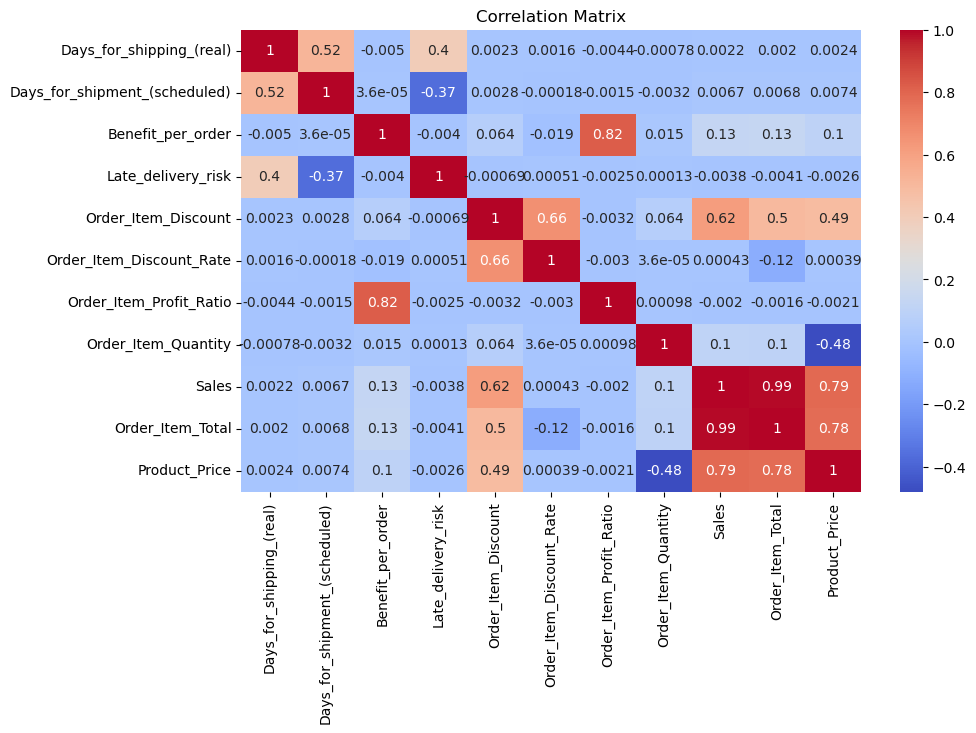

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['shipping_date_only'] = pd.to_datetime(data['shipping_date_only'])

In [ ]:
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
Categorial_cols = data.select_dtypes(include=["object"]).columns.tolist()


In [ ]:
# Example: Feature engineering
data['Shipping_Delay'] = data['Days_for_shipping_(real)'] - data['Days_for_shipment_(scheduled)']


# Encoding
#le = LabelEncoder()
#data['Shipping_Mode_Encoded'] = le.fit_transform(data['Shipping_Mode'])


In [ ]:
data.isnull().sum()

Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Delivery_Status                  0
Late_delivery_risk               0
Category_Name                    0
Customer_Country                 0
Customer_Segment                 0
Market                           0
Order_Country                    0
Order_Item_Discount              0
Order_Item_Discount_Rate         0
Order_Item_Profit_Ratio          0
Order_Item_Quantity              0
Sales                            0
Order_Item_Total                 0
Order_Region                     0
Order_Status                     0
Product_Name                     0
Product_Price                    0
Shipping_Mode                    0
order_date                       0
shipping_date_only               0
Shipping_Delay                   0
dtype: int64

In [ ]:

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
data.describe()

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Late_delivery_risk,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Product_Price,order_date,shipping_date_only,Shipping_Delay
count,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564.000000,124564,124564,124564.000000
mean,3.496187,2.929739,34.355530,0.547999,15.183690,0.100300,0.249625,2.341230,153.479920,138.296385,83.858735,2016-05-25 10:46:25.112873984,2016-05-28 22:40:55.643684864,0.566448
min,0.000000,0.000000,-79.209999,0.000000,0.000000,0.000000,-0.280000,1.000000,9.990000,7.490000,9.990000,2015-01-01 00:00:00,2015-01-03 00:00:00,-2.000000
25%,2.000000,2.000000,11.880000,0.000000,4.500000,0.040000,0.110000,1.000000,100.000000,94.484999,49.980000,2015-09-12 00:00:00,2015-09-16 00:00:00,0.000000
50%,3.000000,4.000000,30.969999,1.000000,11.200000,0.090000,0.290000,2.000000,129.990005,127.389999,59.990002,2016-05-25 00:00:00,2016-05-29 00:00:00,1.000000
75%,5.000000,4.000000,54.910000,1.000000,23.400000,0.160000,0.380000,4.000000,199.990005,185.929993,129.990005,2017-02-04 00:00:00,2017-02-07 00:00:00,1.000000
max,6.000000,4.000000,151.339996,1.000000,61.189999,0.250000,0.500000,5.000000,400.000000,391.959992,249.990005,2017-12-31 00:00:00,2018-01-06 00:00:00,4.000000
std,1.625427,1.376305,33.071554,0.497693,13.271496,0.069433,0.187923,1.459534,73.333386,67.601515,53.886354,NaN,NaN,1.491402


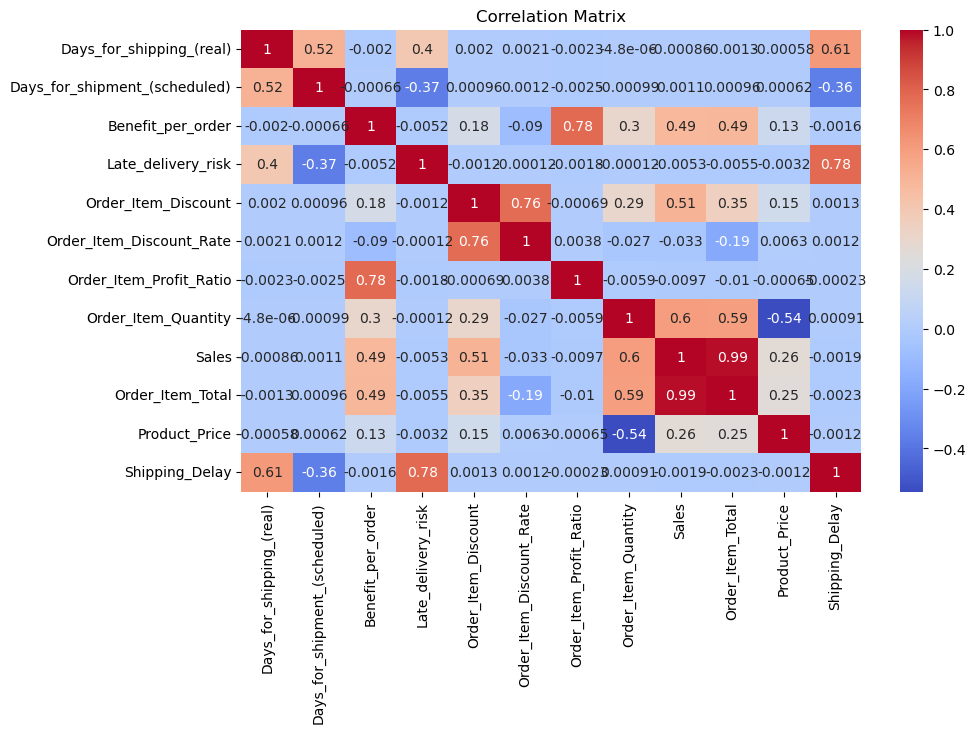

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
categorical_ordinal_cols = ['Delivery_Status', 'Order_Status']
categorical_nominal_cols= ['Category_Name','Customer_Country','Customer_Segment','Order_Region','Market','Order_Country','Product_Name','Type']

#One hot Encoding
# Perform one-hot encoding only on specified columns
data_encoded = pd.get_dummies(data, columns=categorical_nominal_cols, drop_first=True)

# Verify the result
print("Shape of the original dataset:", data.shape)
print("Shape of the dataset after one-hot encoding:", data_encoded.shape)
print(data_encoded.head())


Shape of the original dataset: (124564, 25)
Shape of the dataset after one-hot encoding: (124564, 342)
   Days_for_shipping_(real)  Days_for_shipment_(scheduled)  Benefit_per_order  \
0                         5                              2         -30.750000   
2                         6                              2          33.599998   
3                         2                              2          24.690001   
4                         3                              2           9.100000   
5                         5                              2         -21.750000   

    Delivery_Status  Late_delivery_risk  Order_Item_Discount  \
0     Late delivery                   1                  4.8   
2     Late delivery                   1                  4.0   
3  Shipping on time                   0                  4.0   
4     Late delivery                   1                  9.0   
5     Late delivery                   1                 13.0   

   Order_Item_Discount_Ra

In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_ordinal_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded.sort_values(by='order_date', inplace=True)

In [ ]:
# Target and Features
X = data_encoded.drop(['Shipping_Mode','order_date','shipping_date_only','Days_for_shipping_(real)','Days_for_shipment_(scheduled)'], axis=1)
y = data_encoded['Shipping_Mode']  # Target variable

# Encode the target as it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Data preprocessing (fill NaN, encode categorical variables, scale numeric data)
# Fill missing values
# Encode categorical features
#X = pd.get_dummies(X, drop_first=True)

print(y)

[0 3 3 ... 3 3 3]


In [ ]:
# Check the mapping
class_mapping = dict(enumerate(le.classes_))
print(class_mapping)


{0: 'First Class', 1: 'Same Day', 2: 'Second Class', 3: 'Standard Class'}


In [ ]:
# Before encoding
#print("Target column unique values:\n", data['Shipping_Mode'].unique())
#print("Target column value counts:\n", data['Shipping_Mode'].value_counts())

# After encoding
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(data['Shipping_Mode'])

#print("Encoded classes:", le.classes_)
#print("Transformed target variable (first 20 values):", y[:50])


In [ ]:
res = list(set(y))
print(res)

[0, 1, 2, 3]


In [ ]:
X.isnull().sum()

Benefit_per_order                                             0
Delivery_Status                                               0
Late_delivery_risk                                            0
Order_Item_Discount                                           0
Order_Item_Discount_Rate                                      0
                                                             ..
Product_Name_adidas Youth Germany Black/Red Away Match Soc    0
Product_Name_insta-bed Neverflat Air Mattress                 0
Type_DEBIT                                                    0
Type_PAYMENT                                                  0
Type_TRANSFER                                                 0
Length: 337, dtype: int64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Accuracy: 0.7034135063100093

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.59      0.53      4765
           1       0.25      0.03      0.05      1706
           2       0.89      0.43      0.58      6061
           3       0.74      0.88      0.81     18609

    accuracy                           0.70     31141
   macro avg       0.59      0.48      0.49     31141
weighted avg       0.70      0.70      0.68     31141

Benefit_per_order: 0.0738
Delivery_Status: 0.0623
Late_delivery_risk: 0.0549
Order_Item_Discount: 0.0546
Order_Item_Discount_Rate: 0.0494
Order_Item_Profit_Ratio: 0.0666
Order_Item_Quantity: 0.0179
Sales: 0.0253
Order_Item_Total: 0.0560
Order_Status: 0.0280
Product_Price: 0.0152
Shipping_Delay: 0.2031
Category_Name_As Seen on  TV!: 0.0000
Category_Name_Baby : 0.0002
Category_Name_Baseball & Softball: 0.0006
Category_Name_Books : 0.0002
Category_Name_Boxing & MMA: 0.0004
Category_Name_CDs : 0.0001
Category_

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Classifier Performance:")
print(classification_report(y_test, xgb_predictions))
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

C:\Users\vbopp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier Performance:
              precision    recall  f1-score   support

           0       0.46      0.92      0.62      4765
           1       0.56      0.01      0.02      1706
           2       0.99      0.41      0.58      6061
           3       0.80      0.82      0.81     18609

    accuracy                           0.71     31141
   macro avg       0.70      0.54      0.51     31141
weighted avg       0.77      0.71      0.69     31141

XGBoost Accuracy: 0.71


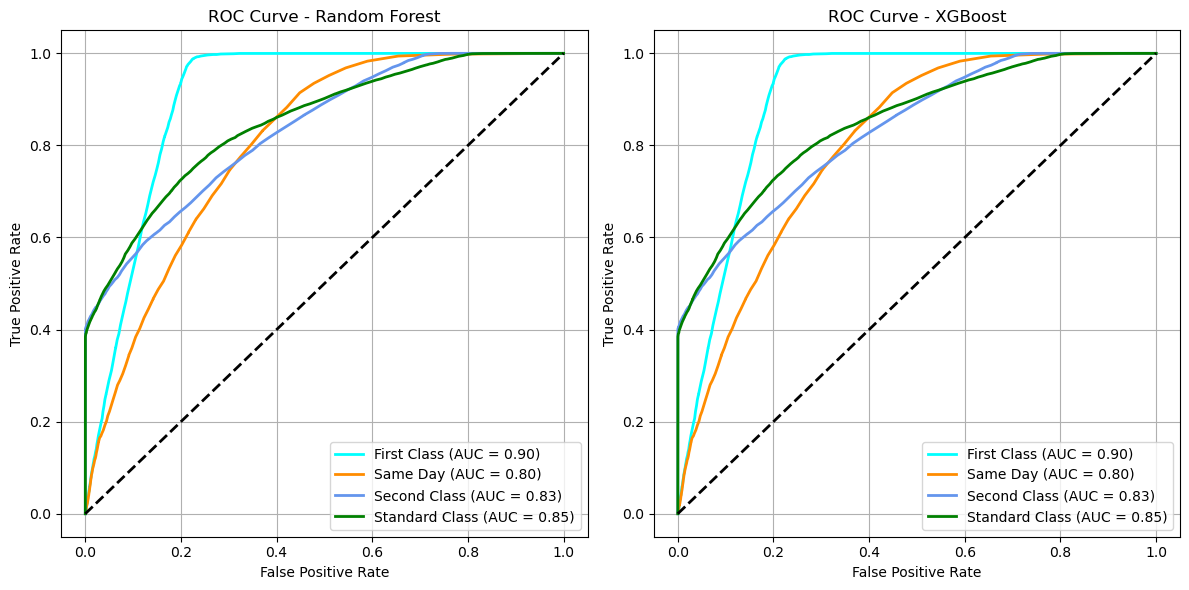

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binarize the target for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Predict probabilities
y_pred_prob_rf = rf_model.predict_proba(X_test)  # For Random Forest
y_pred_prob_xgb = xgb_model.predict_proba(X_test)  # For XGBoost

# Number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC and AUC for Random Forest
fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC and AUC for XGBoost
fpr_xgb = {}
tpr_xgb = {}
roc_auc_xgb = {}

for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves for both models
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
plt.figure(figsize=(12, 6))
class_names = ["First Class", "Same Day", "Second Class", "Standard Class"]  # Update with actual labels

# Random Forest ROC Curve
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc_rf[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()

# XGBoost ROC Curve
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc_rf[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()

plt.tight_layout()
plt.show()

